<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 1:</span> Exploratory Analysis</h1>
<hr>

Our goal with this step is to "get to know" the data. 
* Think of it like a "first date." 
* Try to learn as much about the data as possible, but don't invest too much time and get stuck on this step.
* Note: we'll probably need to do ad-hoc data exploration later anyway, so we don't need to be 100% comprehensive right now.
<br><hr id="toc">

It's essential to go through the essential exploratory analysis steps:
1. [Basic information](#basic)
2. [Distributions of numeric features](#numeric)
3. [Distributions of categorical features](#categorical)
4. [Segmentations](#segmentations)
5. [Correlations](#correlations)


### Import libraries and load the dataset.

In [53]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns

In [54]:
# Load real estate data from CSV
df = pd.read_csv('project_files/real_estate_data.csv')

# 1. Basic information
First, always look at basic information about the dataset. 
<br>
Display the dimensions of the dataset.

In [55]:
# Dataframe dimensions: 1883 observations, 26 features
df.shape

(1883, 26)

In [56]:
# Type of df.types
type(df.dtypes)

pandas.core.series.Series

Our df is of series type.


Now display the data types of our features.

In [57]:
# Column datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

What to look for in the datatypes
Check to see which types of features you have.

Those with int64 or float64 are numeric features
Those with object are categorical features.
As you can see, all of the columns are numeric, except for 3 categorical ones:

1. 'exterior_walls'
2. 'property_type'
3. 'roof'

Check to see if any data types are incorrect.

Check if any numeric features should be categorical instead.
Or (more commonly), check if any categorical features should be numeric instead.
If a data dictionary was provided, that's a great place to check. Use it to check if any columns were imported as incorrect data types.

Display the first 5 rows to see example observations.

In [58]:
# Display first 5 rows of df
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


The purpose of displaying examples from the dataset is not to perform rigorous analysis.

Instead, it's to get a qualitative "feel" for the dataset.

Important Questions to Ask oneself:

1. Do the columns make sense?
2. Do the values in those columns make sense?
3. Are the values on the right scale?
4. Is missing data going to be a big problem based on a quick eyeball test?
5. What types of classes are there in the categorical features?

Now let's dig a bit deeper into some of these functionalities. Getting some extra information right now will set you us up for smoother work and success as we continue on through the project.

<br>
** Let's filter <code style="color:steelblue">df.dtypes</code> to only categorical variables.**
* *** Use handy boolean masks 
* *** A Series can be filtered by boolean masks the same way that a DataFrame can be.

In [69]:
# Filter and display only df.dtypes that are 'object'
category_mask = df.dtypes == 'object'
df.dtypes[category_mask]

property_type     object
exterior_walls    object
roof              object
dtype: object

By the way, to actually get the **feature names** that you can iterate through, you have to access the <code style="color:steelblue">.index</code> attribute.

<br>
**Iterate through the categorical feature names and print each name.**
* **Tip:** Filter as you did above, and then call the <code style="color:steelblue">.index</code> attribute

In [70]:
# Loop through categorical feature names and print each one
for word in cat_mask.index:
    if (cat_mask[word] == True):
        print(word)

property_type
exterior_walls
roof


A thing to note, the ability to select feature names based on some condition (instead of manually typing out each one) comes to be very useful.

In [66]:
# Display the first 10 rows of data
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


Finally, it's also helpful to look at the last rows of our data.
* Sometimes datasets will have **corrupted data** hiding at the very end (depending on the data source).
* It never hurts to double-check.

In [65]:
# Display last 10 rows of data
df.tail(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1873,569000,5,5,7165,1991,43995,Single-Family,Brick,Wood Shake/ Shingles,1.0,9,1,1,1,11,1,3,6,49.0,82.0,68.0,1024.0,312.0,8.0,2.0,1994
1874,370000,5,5,7578,2008,87120,Single-Family,Siding (Alum/Vinyl),Composition Shingle,1.0,0,0,0,0,1,0,0,2,47.0,92.0,84.0,1045.0,318.0,9.0,3.0,2004
1875,235000,5,5,7594,2006,36154,Single-Family,Brick,Composition Shingle,1.0,8,1,0,1,5,4,5,2,52.0,85.0,57.0,1061.0,323.0,5.5,2.0,2006
1876,760000,5,5,7842,2003,436035,Single-Family,Combination,NaN,1.0,0,0,0,0,0,0,0,0,48.0,76.0,62.0,881.0,249.0,7.5,2.0,2008
1877,555000,5,5,8450,2004,91911,Single-Family,Other,Composition Shingle,1.0,7,2,1,1,4,0,3,3,35.0,91.0,85.0,1966.0,599.0,10.0,3.0,2003
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


<br id="numeric">
# 2. Distributions of numeric features

One of the most enlightening data exploration tasks is plotting the distributions of your features.


What to look for in the distributions:

1. Distributions that are unexpected (e.g a large spike in houses with 10 bedrooms)
2. Potential outliers that don't make sense
3. Sparsed data 
4. Features that should be binary (e.g. value of 200 for 0-1 variable)
5. Boundaries that don't make sense (e.g.percent married of above 100 or below 0)
6. Potential measurement errors 

**Plot the histogram grid, make it larger, and rotate the x-axis labels clockwise by 45 degrees.**
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">figsize=</code> argument takes a tuple for figure size.
* <code style="color:steelblue">df.hist()</code> has a <code style="color:steelblue">xrot=-45</code> argument rotates x-axis labels **counter-clockwise**.
* The [documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.hist.html) is useful for learning more about the arguments to the <code style="color:steelblue">.hist()</code> function.
* **Tip:** It's ok to arrive at the answer through **trial and error** (this is often easier than memorizing the various arguments).

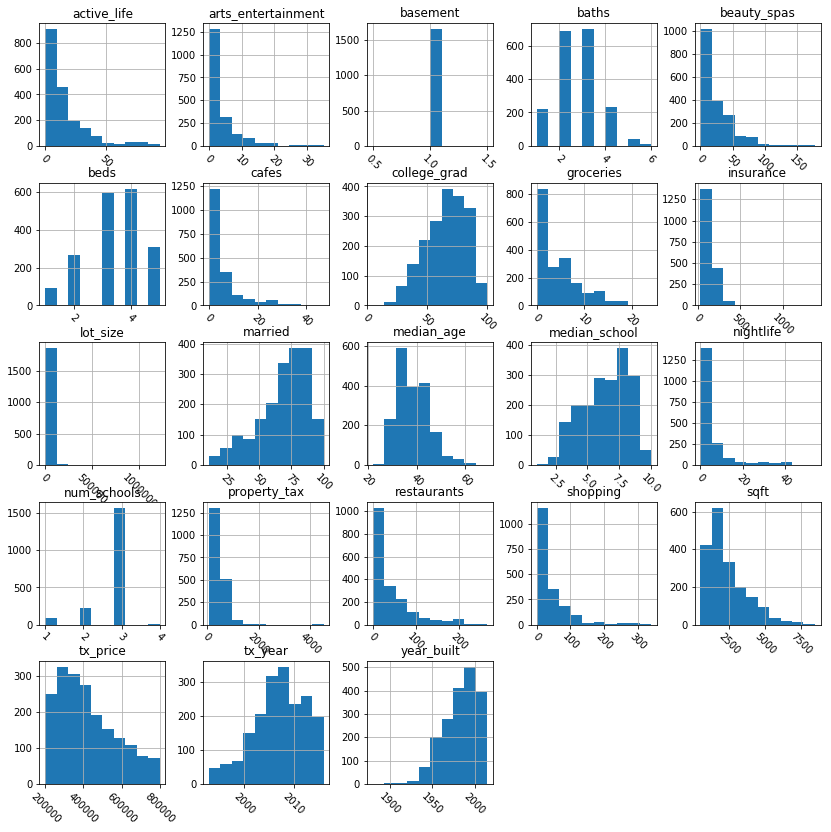

In [71]:
# Plot histogram grid
df.hist(grid=(6,4), figsize=(14,14), xrot=-45)
# Clear the text "residue"
%clear

Limitations of the histogram grid:

Often, a quick and dirty grid of histograms like the one above is enough to understand the distributions. However, sometimes you may need formal summary statistics.

Display summary statistics for the numerical features.

In [61]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


<br id="categorical">
# 3. Distributions of categorical features

Taking a deeper look at the distributions of our categorical features.
<br>
Display summary statistics for categorical features.

In [64]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


Here, we can see the number of unique classes for each feature, along with the most frequent class.

Two things:
We see that 'exterior_walls' and 'roof' only has 1660 and 1529 observations (count), respectively. But we saw earlier that we have 1883 in total. This indicates missing data.

Let's visualize all our categorical variables, just as we did for the numerical features.

**We use a for <code style="color:steelblue">for</code> loop to plot bar plots of each of the categorical features.**
Caveats: 
*   We write the loop to be able to handle any number of categorical feature
* Invoke <code style="color:steelblue">plt.show()</code> after each bar plot to display all 3 plots in one output.
* Check if our features suffer from sparse classes!

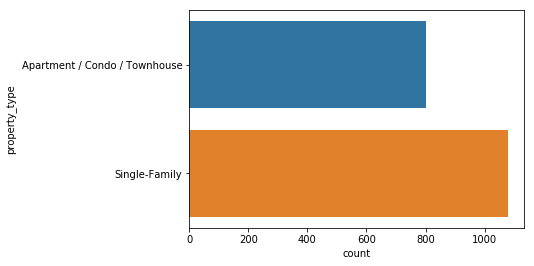

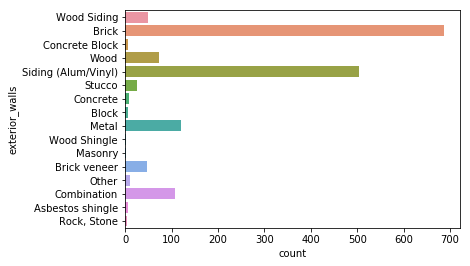

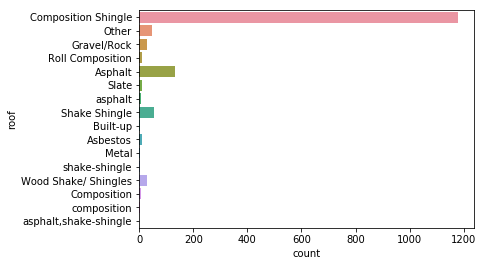

In [76]:
# Bar plot for our categorical variable - using a loop + seaborn 
for category in df.dtypes[df.dtypes=='object'].index:
    sns.countplot(y=category, data=df)
    plt.show()

<br id="segmentations">
# 4. Segmentations

Segmentations are powerful ways to cut the data to observe the relationship between **categorical features** and **numeric features**.

<br>
Segment <code style="color:steelblue">'tx_price'</code> by <code style="color:steelblue">'property_type'</code> and plot the resulting distributions

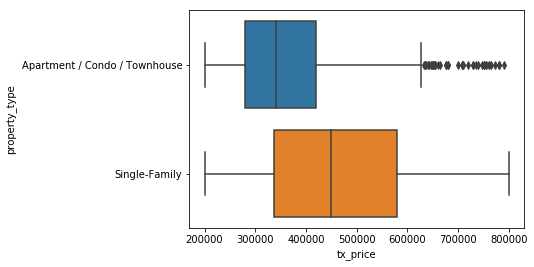

In [78]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

Segment by <code style="color:steelblue">'property_type'</code> and calculate the average value of each feature within each class:

In [80]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


On average, it looks like single family homes are more expensive.

Check to see how the different property types differ.

Segment <code style="color:steelblue">'sqft'</code> by <code style="color:steelblue">'property_type'</code> and plot the boxplots.**

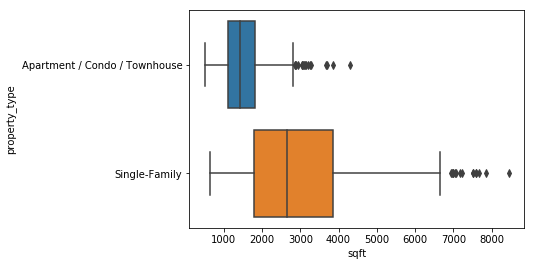

In [82]:
# Segment sqft by sqft and property_type distributions
sns.boxplot(y='property_type', x='sqft', data=df)

<br>
**After producing our categorical/numerical plot comparsons, remember to consider these questions:**
* Which type of category is larger, on average?
* Which type of category sees greater variance in sizes?
* Does the difference in distributions between classes make intuitive sense?

**Display the standard deviations of each feature alongside their means after performing a groupby.**
* This will give us a better idea of the variation within in feature, by class.
* remember we can take list of metrics into the .agg() function, after performing groupby()

In [84]:
# Segment by property_type and display the means and standard deviations within each class
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

<br id="correlations">
# 5. Correlations

Lastly, take a look at the relationships between **numeric features** and **other numeric features**.

<br>We Create a <code style="color:steelblue">correlations</code> dataframe from <code style="color:steelblue">df</code>.

In [85]:
# Calculate correlations between numeric features
correlations = df.corr()

The correlations object is now a big dataframe that contains all of the correlations between numeric features.
* Look for strong correlations (close to -1 and 1) and weak correlations ( -.5 through .5 )

In [86]:
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


Note: it's important to notice that the correlations for 'basement' all show as NaN.
This is expected because right now that feature doesn't vary at all (its standard deviation is 0). Fix that.

Very Handy use of HeatMaps: Visualize the correlation grid with a heatmap to make it easier to digest.

When plotting a heatmap of correlations, it's often helpful to do four things:
1. Change background to white for correlation (easier to visualize)
2. Annotate the cell with their correlations values
3. Mask the top triangle (less visual noise)
4. Drop the legend (colorbar on the side)

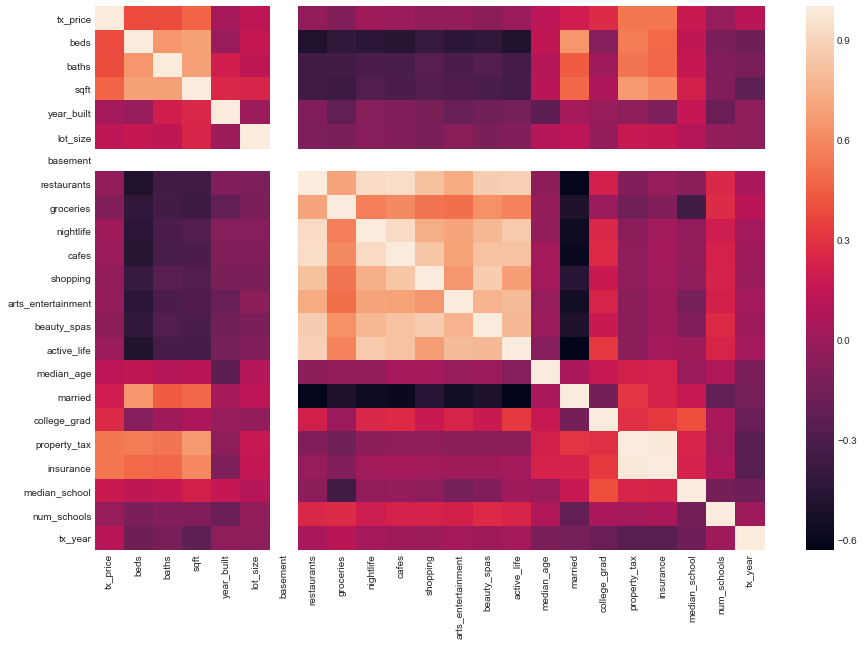

In [96]:
# Change color scheme
sns.set_style("white")
# Make the figsize large for easier viewing
plt.figure(figsize=(15,10))
# Plot heatmap of correlations
sns.heatmap(correlations)
%clear

* Again, we are primarily looking to gain a better intuitive understanding of the data, which will help us build our model and solve our problem.

### Interpret correlation heatmaps by first finding features that are correlated with our target variable.

First, scan the left side to find the row with 'tx_price'.
Then, scan the row to see if any of the boxes are dark red (strong positive correlation) or dark blue (strong negative correlation).

See how the cells for <code style="color:steelblue">'basement'</code> are now white? That's what we want because they were not able to be calculated. Time to fix:

<br>
**Lets display the correlation values in each cell.**
* The <code style="color:steelblue">annot=</code> argument controls whether to annotate each cell with its value. By default, it's <code style="color:crimson">False</code>.

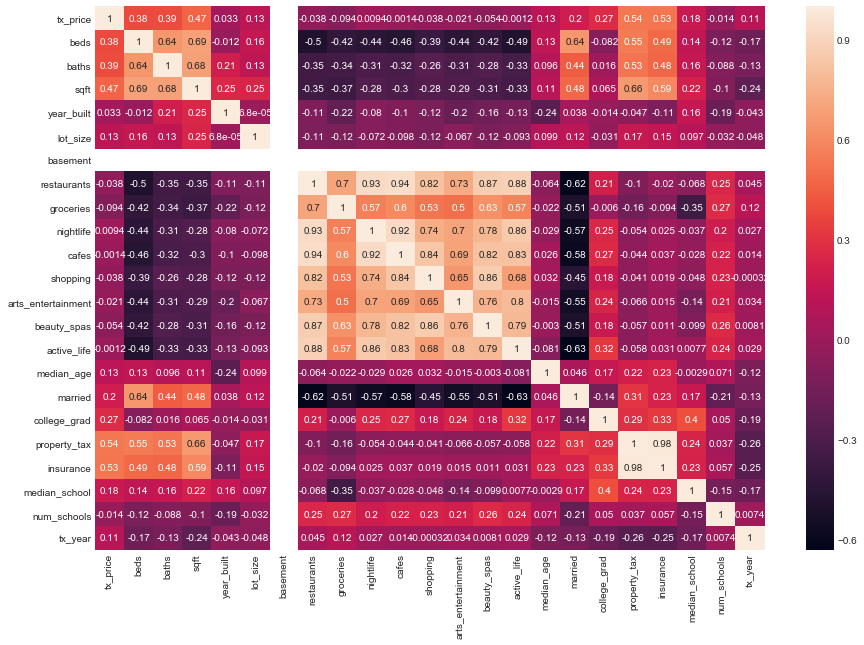

In [102]:
# Make the figsize 15 x 10
plt.figure(figsize=(15,10))
# Plot heatmap of annotated correlations
sns.heatmap(correlations, annot=True)

<br>
**Let's generate a mask for the top triangle:

In [104]:
# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<br>
**Plot the heatmap again, this time using that mask.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.
* Keep all of the other styling changes

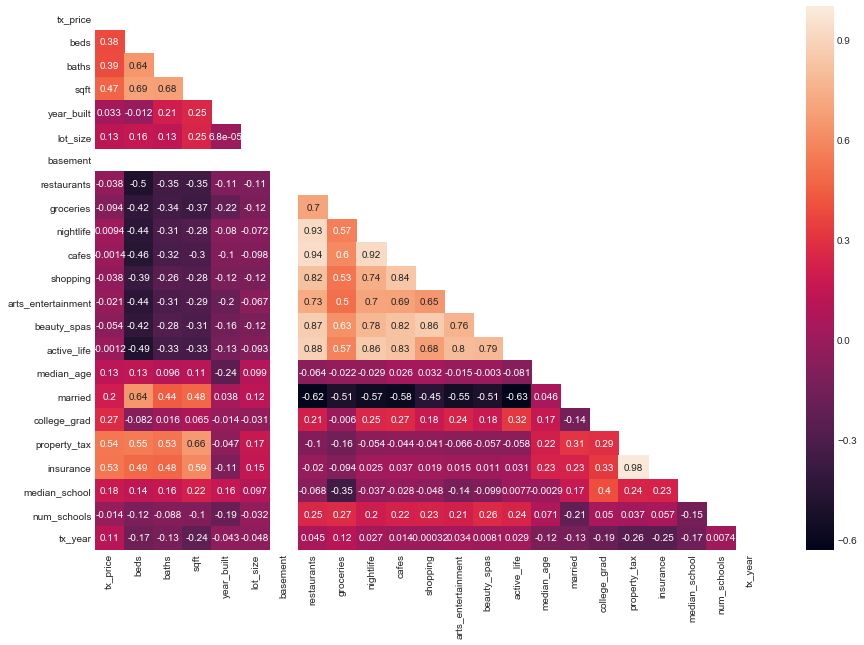

In [105]:
# Make the figsize 10 x 8
plt.figure(figsize=(15,10))
# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, mask = mask )

<br>
**Remove the colorbar on the side.**
* <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">cbar=</code> argument. By default, it's <code style="color:crimson">True</code>.
* Change the figure size to 10 x 9 (since we're removing the sidebar, this will help us keep nice proportions)

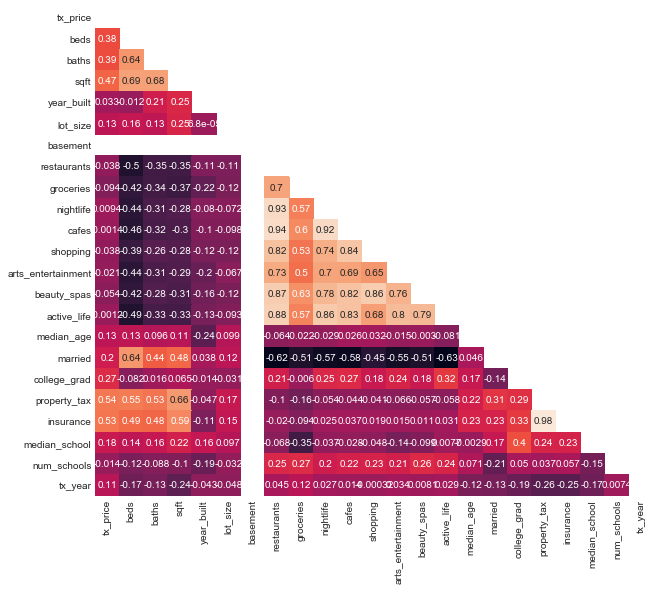

In [106]:
# Make the figsize 10 x 9
plt.figure(figsize=(10,9))
# Plot heatmap of correlations
sns.heatmap(correlations, annot=True, mask = mask, cbar=False)

The first step of any project, the exploratory analysis of the data, is to understand the **story** behind the data.

Remember, the things you should aim to do to explore your data:
* Explore basic information about your dataset.
* Plot distributions of numeric and categorical features.
* Segmented your dataset by different<code style="color:steelblue">'category_types'</code>.
* Visualized a heatmap of feature correlations to see if there are relatioships between features and target variable.

## Next Steps

It is highly helpful to have your charts in front of you as you clean your data, build your model, and interpret your results.